# Первая часть. Исследование

* catboost.__version__ == 1.1.1
* matplotlib.__version__ == 3.5.3
* sklearn.__version__ == 0.21.0
* pandas.__version__ == 1.3.1
* numpy.__version__ == 1.19.5

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
print(data.shape)
data.head()

(5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
print(data.count())
data.drop_duplicates().count()
# Видим дубликаты

ClientPeriod                5282
MonthlySpending             5282
TotalSpent                  5282
Sex                         5282
IsSeniorCitizen             5282
HasPartner                  5282
HasChild                    5282
HasPhoneService             5282
HasMultiplePhoneNumbers     5282
HasInternetService          5282
HasOnlineSecurityService    5282
HasOnlineBackup             5282
HasDeviceProtection         5282
HasTechSupportAccess        5282
HasOnlineTV                 5282
HasMovieSubscription        5282
HasContractPhone            5282
IsBillingPaperless          5282
PaymentMethod               5282
Churn                       5282
dtype: int64


ClientPeriod                5268
MonthlySpending             5268
TotalSpent                  5268
Sex                         5268
IsSeniorCitizen             5268
HasPartner                  5268
HasChild                    5268
HasPhoneService             5268
HasMultiplePhoneNumbers     5268
HasInternetService          5268
HasOnlineSecurityService    5268
HasOnlineBackup             5268
HasDeviceProtection         5268
HasTechSupportAccess        5268
HasOnlineTV                 5268
HasMovieSubscription        5268
HasContractPhone            5268
IsBillingPaperless          5268
PaymentMethod               5268
Churn                       5268
dtype: int64

In [6]:
data = data.drop_duplicates()
data.drop_duplicates().count()


ClientPeriod                5268
MonthlySpending             5268
TotalSpent                  5268
Sex                         5268
IsSeniorCitizen             5268
HasPartner                  5268
HasChild                    5268
HasPhoneService             5268
HasMultiplePhoneNumbers     5268
HasInternetService          5268
HasOnlineSecurityService    5268
HasOnlineBackup             5268
HasDeviceProtection         5268
HasTechSupportAccess        5268
HasOnlineTV                 5268
HasMovieSubscription        5268
HasContractPhone            5268
IsBillingPaperless          5268
PaymentMethod               5268
Churn                       5268
dtype: int64

#### Анализ числовых переменных

In [7]:
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent          object
dtype: object

In [8]:
sorted(data.TotalSpent.unique())[:5]

[' ', '100.2', '100.25', '100.35', '100.4']

* Необходимо избавиться от ' ' заменив их на np.nan и задать тип float для численной переменной

In [9]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: np.nan if x == ' ' else np.float64(x))
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent         float64
dtype: object

#### Анализ категориальных переменных

In [10]:
data[cat_cols].dtypes

Sex                         object
IsSeniorCitizen              int64
HasPartner                  object
HasChild                    object
HasPhoneService             object
HasMultiplePhoneNumbers     object
HasInternetService          object
HasOnlineSecurityService    object
HasOnlineBackup             object
HasDeviceProtection         object
HasTechSupportAccess        object
HasOnlineTV                 object
HasMovieSubscription        object
HasContractPhone            object
IsBillingPaperless          object
PaymentMethod               object
dtype: object

In [11]:
(data
 .isna()
 .sum()
 .reset_index()
 .rename(columns={'index':'feature'
                  ,0:'cnt_of_nans'}
        )
 .sort_values('cnt_of_nans'
              ,ascending=False))

,feature,cnt_of_nans
2,TotalSpent,9
0,ClientPeriod,0
11,HasOnlineBackup,0
18,PaymentMethod,0
17,IsBillingPaperless,0
16,HasContractPhone,0
15,HasMovieSubscription,0
14,HasOnlineTV,0
13,HasTechSupportAccess,0
12,HasDeviceProtection,0


In [12]:
# Заменяем пропуски на медианное значение, так как оно усточиво к выбросам

data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].median())

---
## Выводы по первой части: 
* Необходимо избавиться от спец значений '' в переменной TotalSpent и привести ее к численному типу
* Замена спец значений '' в переменной TotalSpent приводит по пропускам np.nan, поэтому пропуски заполняем медианным значением. Данный вид заполнения более устойчив к выбросам
---

In [13]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5268.000000,5268.000000,5268.000000
mean,32.480448,64.977563,2295.862975
std,24.529439,30.176025,2267.419547
min,0.000000,18.250000,18.800000
25%,9.000000,35.537500,405.362500
50%,29.000000,70.450000,1415.000000
75%,55.000000,90.050000,3808.637500
max,72.000000,118.750000,8684.800000


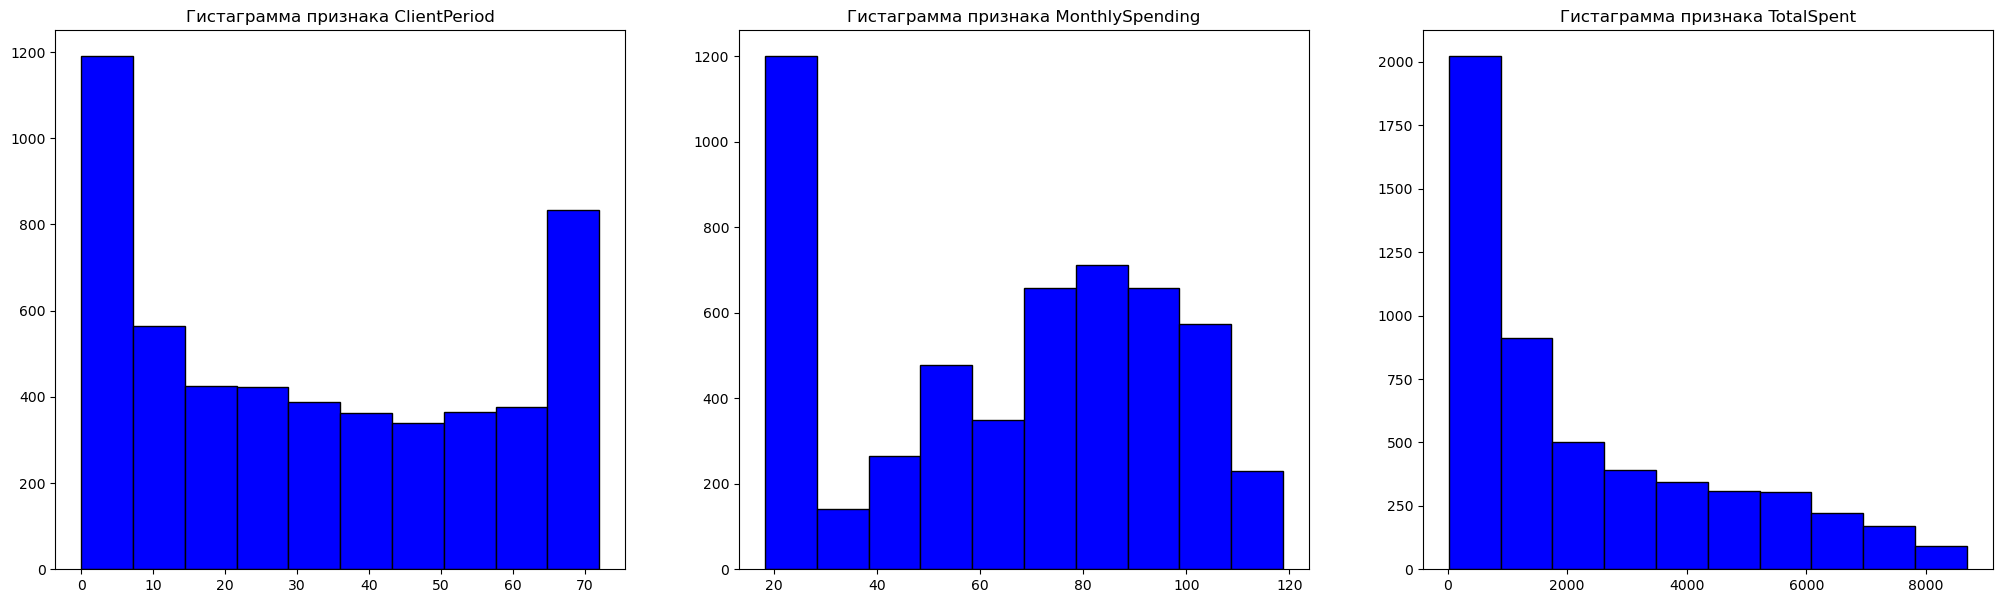

In [14]:
count=1
plt.figure(figsize=[25,7])
ncols = 3
nrows = np.int64(np.ceil(len(num_cols)/ncols))
for i in num_cols:
    
    plt.subplot(nrows,ncols,count)
    plt.hist(data[i], color = 'blue', edgecolor = 'black')
    plt.title(f'Гистаграмма признака {i}')
    
    count+=1
    
plt.show()

#### 1.1.2. Ящик с усами (boxplot) для численных признаков

* Для корректной работы boxplot графика необходимо избавиться от пропусков, поэтому заполню 9 пустых значений фактора TotalSpent медианным значением (более устойчиво к выбросам)

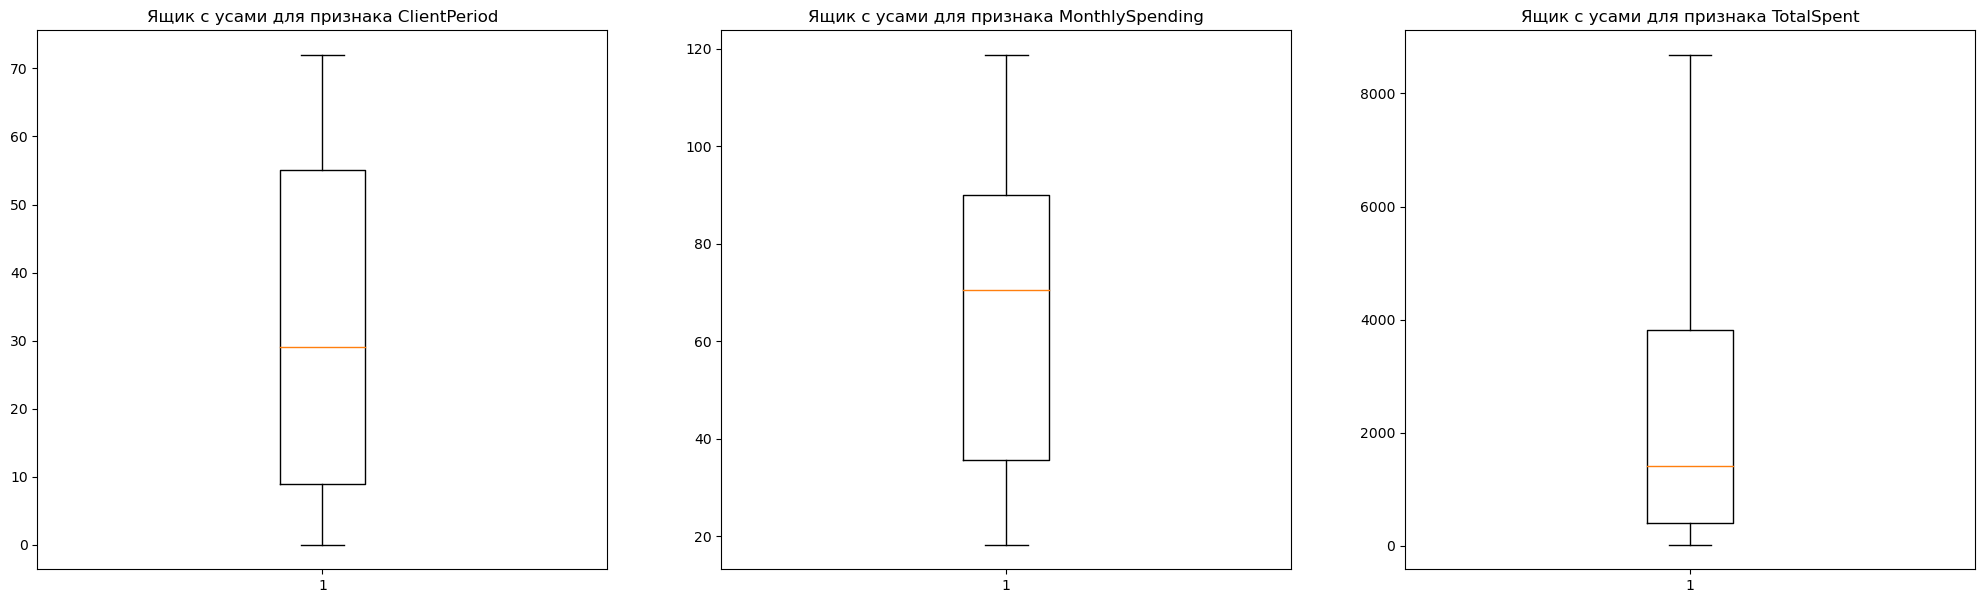

In [15]:
count=1
plt.figure(figsize=[25,7])
ncols = 3
nrows = np.int64(np.ceil(len(num_cols)/ncols))
for i in num_cols:
    plt.subplot(nrows,ncols,count)
    plt.boxplot(data[i].fillna(data[i].median()))
    plt.title(f'Ящик с усами для признака {i}')
    
    count+=1
    
plt.show()

#### 1.2. Расчет количества для каждого категориального признака

In [16]:
for i in cat_cols:
    print(f'Исследуемый признак {i}')
    display(data[i].value_counts())
    print('-'*100)

Исследуемый признак Sex


Male      2647
Female    2621
Name: Sex, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак IsSeniorCitizen


0    4427
1     841
Name: IsSeniorCitizen, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasPartner


No     2691
Yes    2577
Name: HasPartner, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasChild


No     3662
Yes    1606
Name: HasChild, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasPhoneService


Yes    4747
No      521
Name: HasPhoneService, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasMultiplePhoneNumbers


No                  2497
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasInternetService


Fiber optic    2335
DSL            1798
No             1135
Name: HasInternetService, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasOnlineSecurityService


No                     2604
Yes                    1529
No internet service    1135
Name: HasOnlineSecurityService, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasOnlineBackup


No                     2324
Yes                    1809
No internet service    1135
Name: HasOnlineBackup, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasDeviceProtection


No                     2309
Yes                    1824
No internet service    1135
Name: HasDeviceProtection, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasTechSupportAccess


No                     2596
Yes                    1537
No internet service    1135
Name: HasTechSupportAccess, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasOnlineTV


No                     2091
Yes                    2042
No internet service    1135
Name: HasOnlineTV, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasMovieSubscription


No                     2073
Yes                    2060
No internet service    1135
Name: HasMovieSubscription, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasContractPhone


Month-to-month    2906
Two year          1280
One year          1082
Name: HasContractPhone, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак IsBillingPaperless


Yes    3140
No     2128
Name: IsBillingPaperless, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак PaymentMethod


Electronic check             1780
Mailed check                 1186
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: PaymentMethod, dtype: int64

----------------------------------------------------------------------------------------------------


#### 1.2.1 Диаграммы для категориальных признаков plt.bar

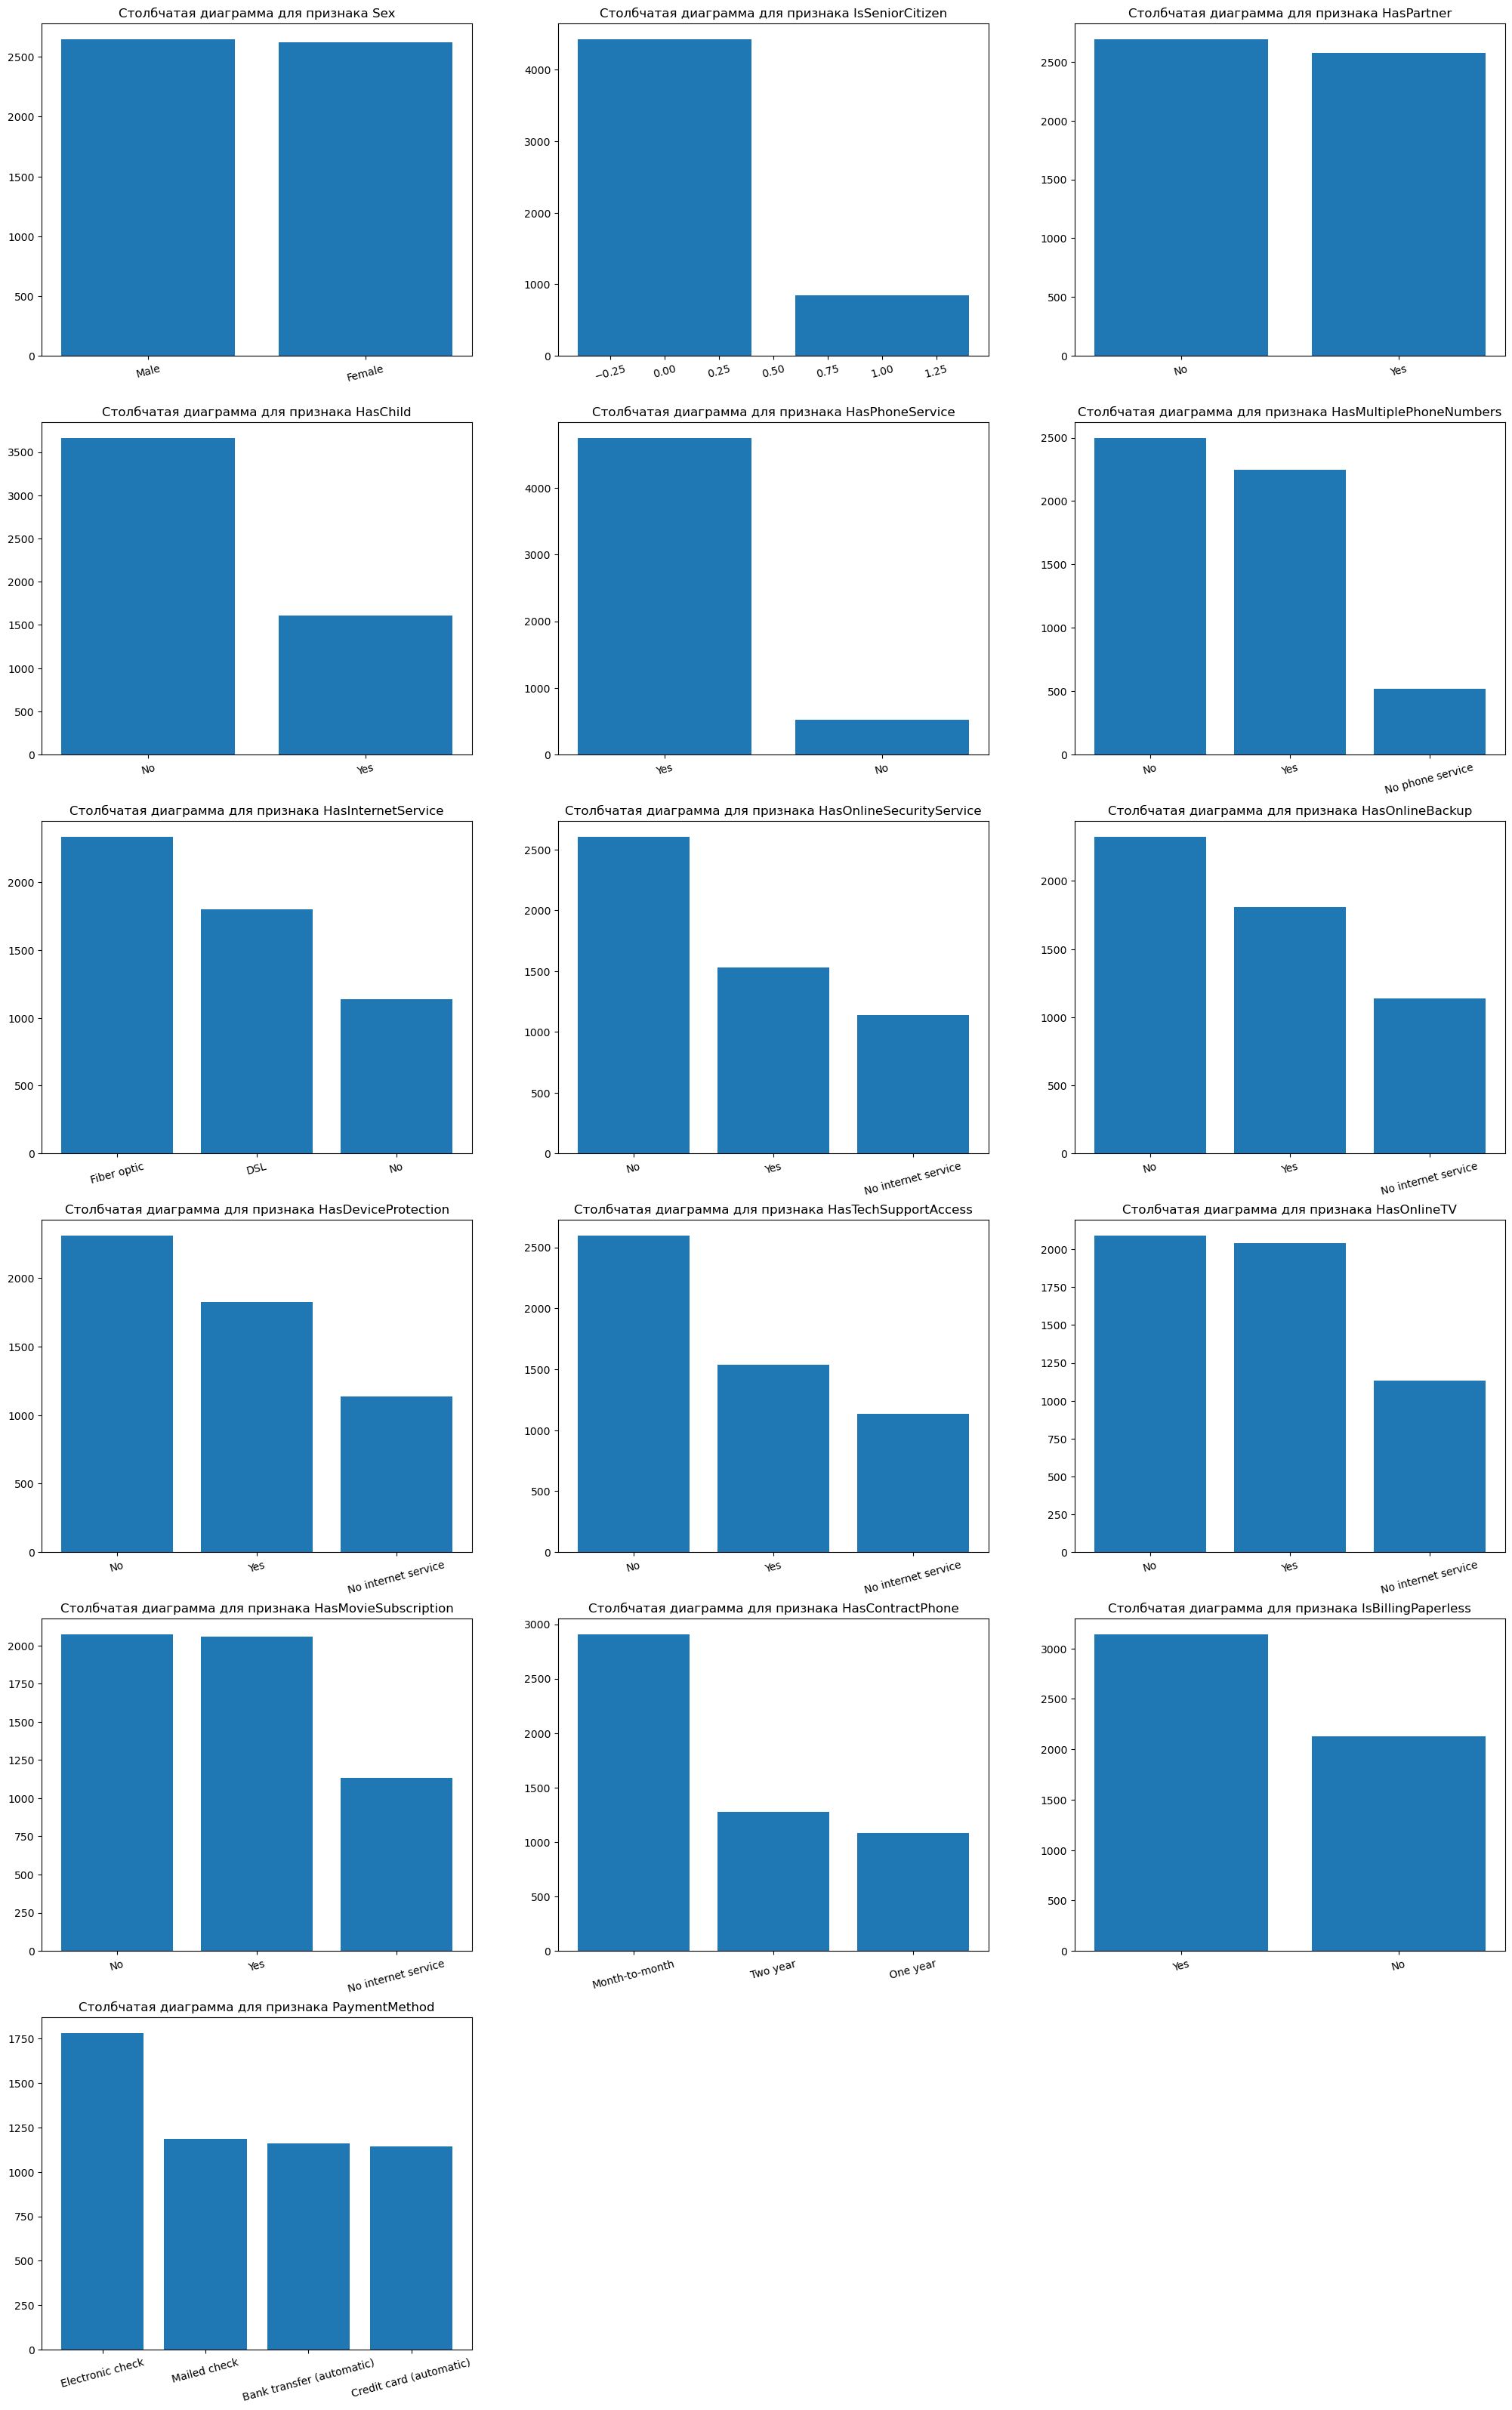

In [17]:
count=1
plt.figure(figsize=[25,40])
ncols = 3
nrows = np.int64(np.ceil(len(cat_cols)/ncols))
for i in cat_cols:
    plt.subplot(nrows,ncols,count)
    plt.bar(data[i].value_counts().index,data[i].value_counts().values)
    plt.title(f'Столбчатая диаграмма для признака {i}')
    plt.xticks(rotation=15)
    
    count+=1
    
plt.show()

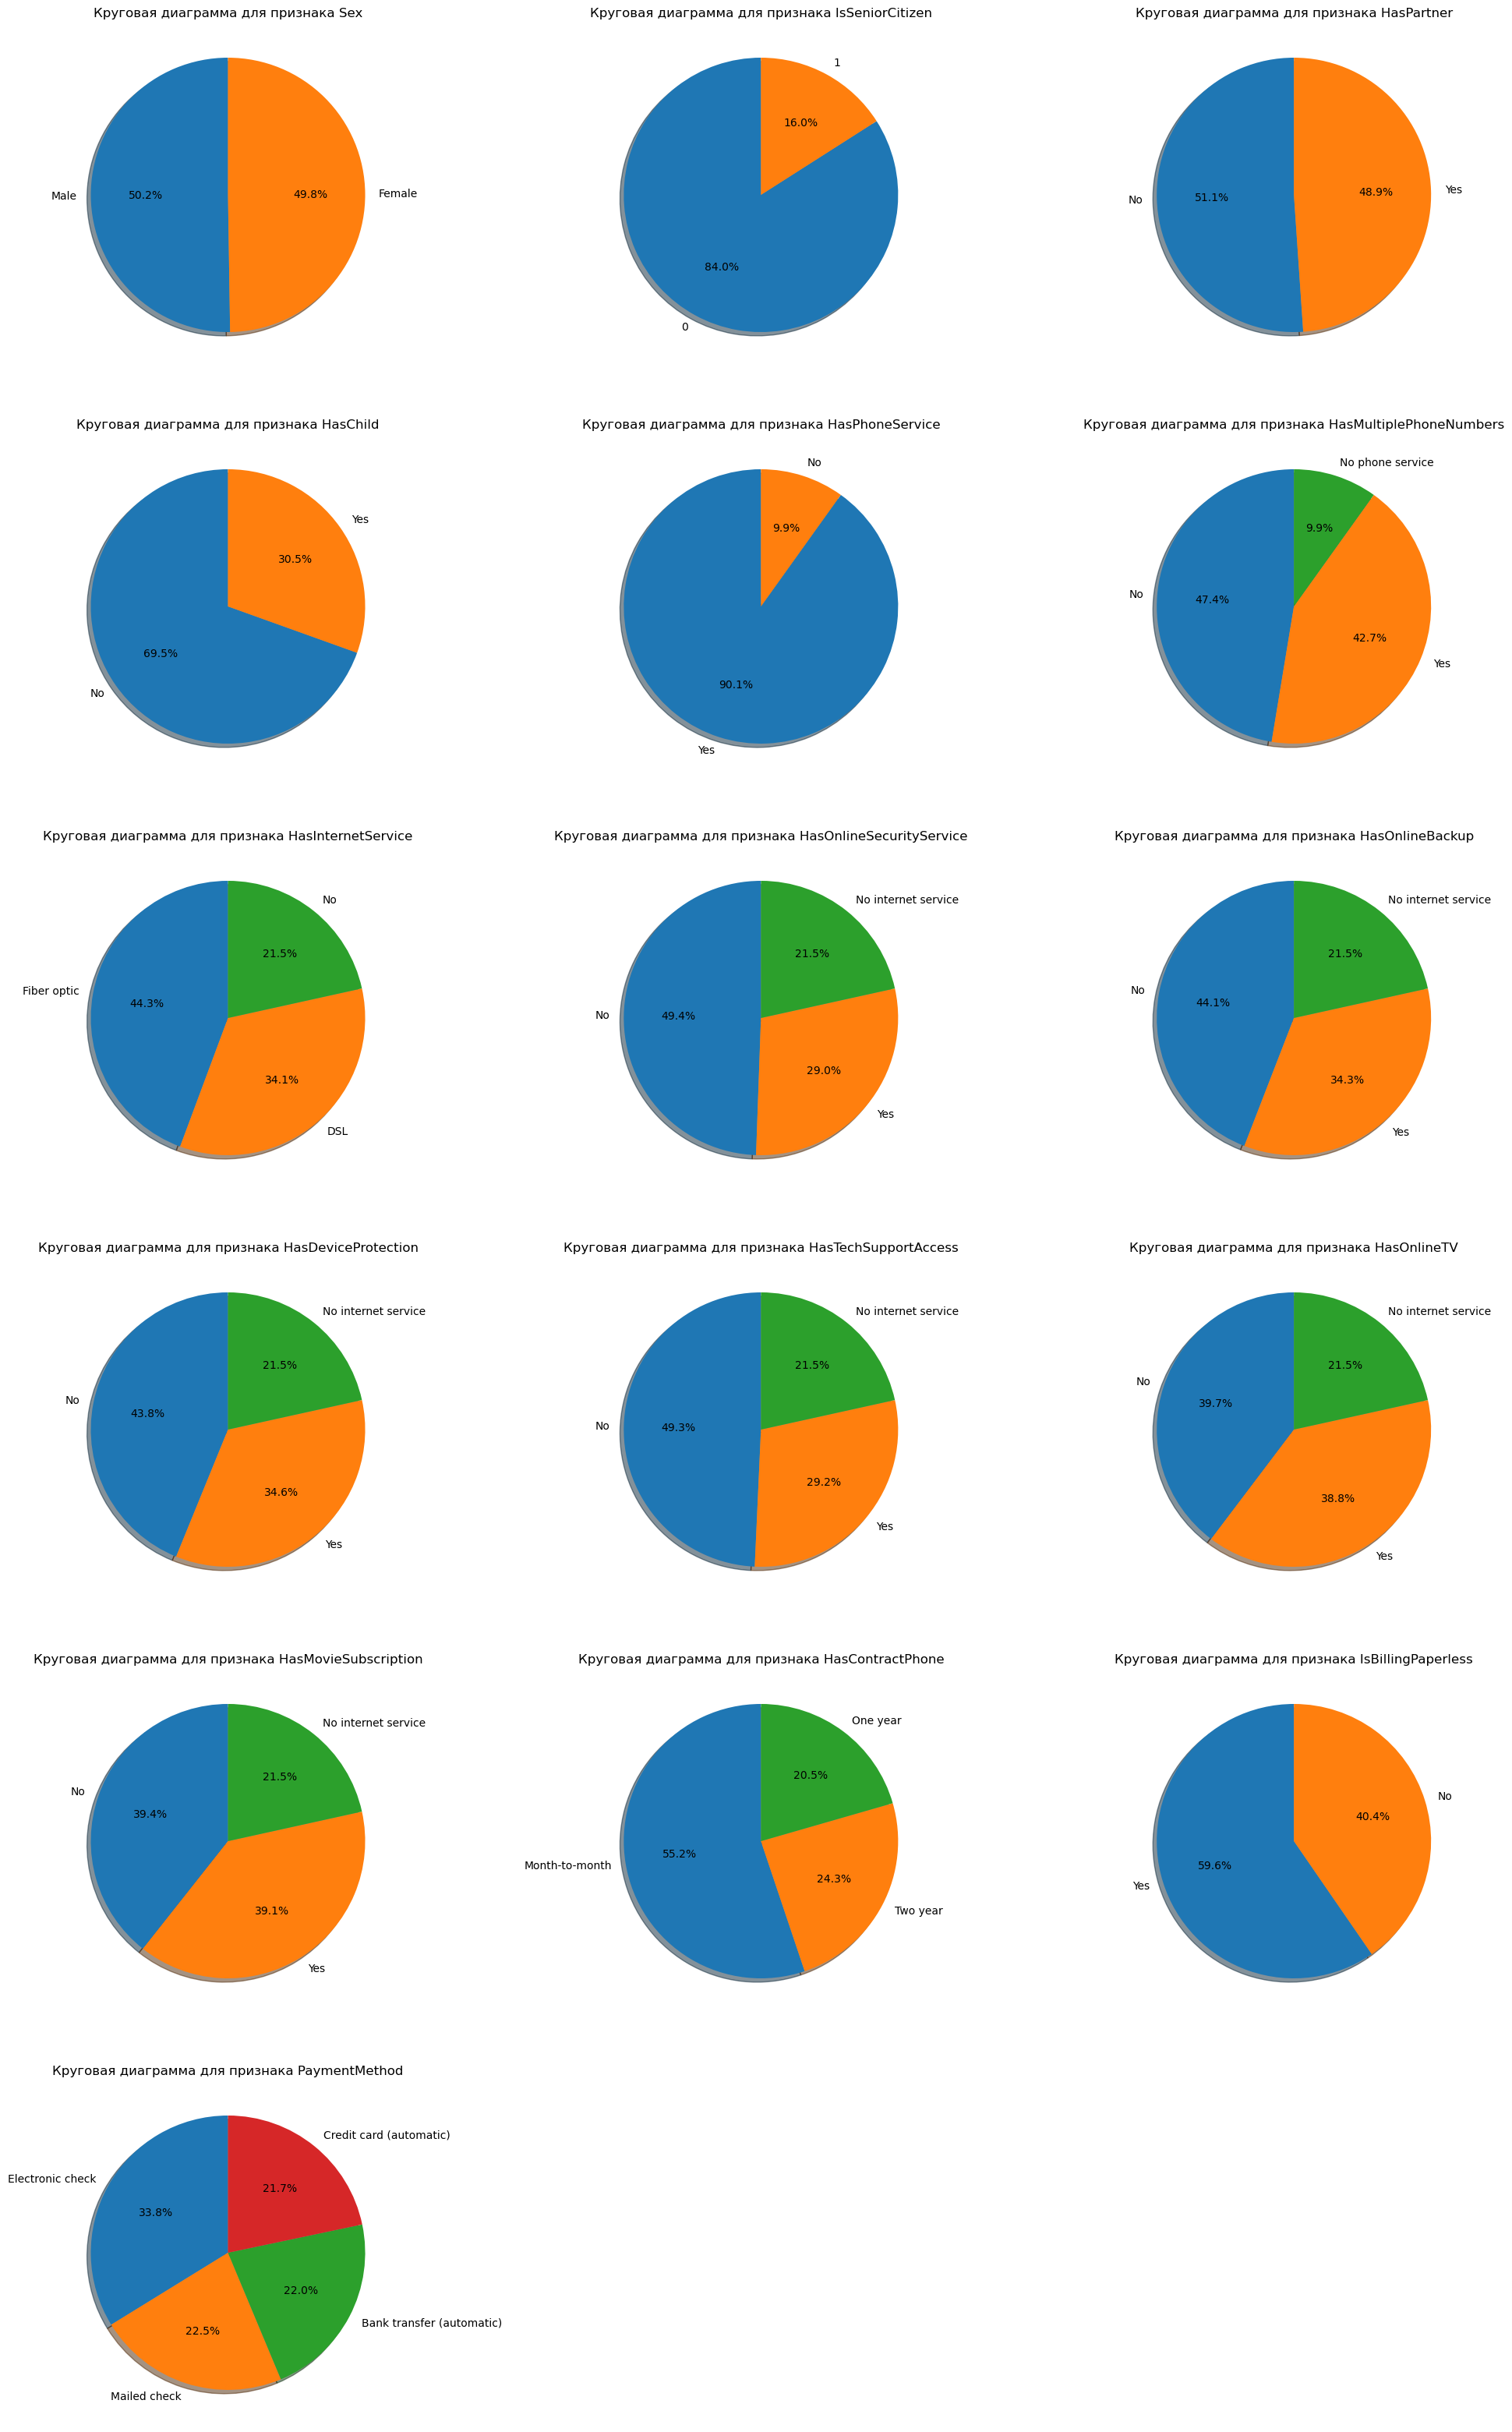

In [18]:
count=1
plt.figure(figsize=[25,40])
ncols = 3
nrows = np.int64(np.ceil(len(cat_cols)/ncols))
for i in cat_cols:
    plt.subplot(nrows,ncols,count)
    plt.pie(x=data[i].value_counts().values,
            labels=data[i].value_counts().index,
            startangle=90,
            autopct='%1.1f%%',
            shadow=True
           )
    plt.title(f'Круговая диаграмма для признака {i}')
    
    count+=1
    
plt.show()

In [19]:
# Количество значений в целевой переменной и их доля

data[target_col].value_counts(), data[target_col].value_counts(normalize=True)

(0    3894
 1    1374
 Name: Churn, dtype: int64,
 0    0.73918
 1    0.26082
 Name: Churn, dtype: float64)

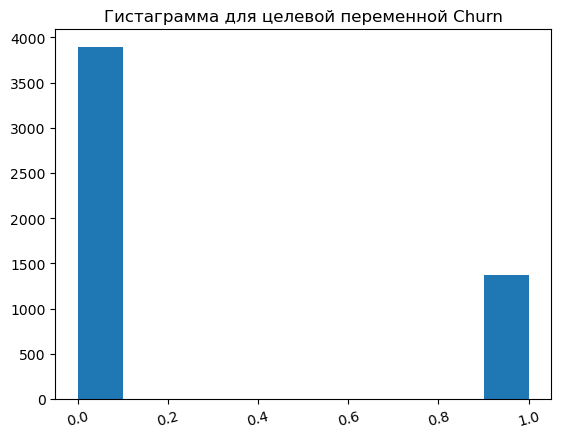

In [20]:
# Гистаграмма по целевой переменной

plt.hist(data[target_col])
plt.title(f'Гистаграмма для целевой переменной {target_col}')
plt.xticks(rotation=15)
plt.show()

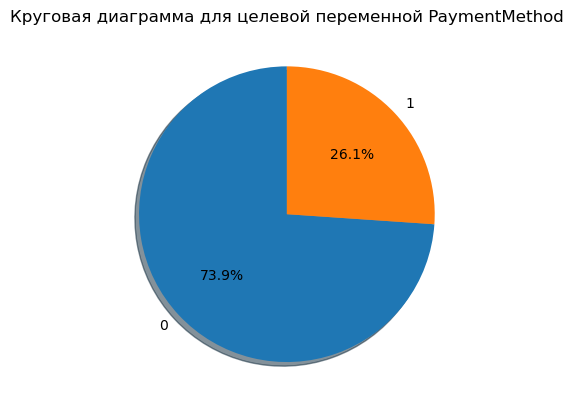

In [21]:
# Круговая диаграмма

plt.pie(x=data[target_col].value_counts().values,
        labels=data[target_col].value_counts().index,
        startangle=90,
        autopct='%1.1f%%',
        shadow=True
       )
plt.title(f'Круговая диаграмма для целевой переменной {i}')
plt.show()

---
## Выводы по второй части: 
* Выбросов как таковых незамечено, пропуски были обработаны в первой части
* Присутствует смещение в двух категориальных признаках таких как: IsSeniorCitizen и HasPhoneService.
* Целевая переменная - несбалансирована. Количество меток = 0 почти в 3 раза больше, чем меток = 1 (~74% и ~26% соответственно). Таким образом для при обучении алгоритмов в валидационой метрике лучше использовать ROC-AUC, Gini или F-score.
---

## Применение линейных моделей



In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [23]:
# Разделим нашу выборку на трейн / валид в соотношении 75 / 25 
# Это необходимо для тестрирования стабильности наших алгоритмов и детекции переобучения

train, valid = train_test_split(data, test_size=0.25, random_state=42)
train, valid = train.reset_index(drop=True), valid.reset_index(drop=True)

print(train.shape, valid.shape)

(3951, 20) (1317, 20)


### 1) Решение:

In [24]:
# Для числовых фичей обучим StandartScaler

scl = StandardScaler()
scl.fit(train[num_cols])

train[[f'{i}_sc' for i in num_cols]] = scl.transform(train[num_cols])
valid[[f'{i}_sc' for i in num_cols]] = scl.transform(valid[num_cols])

In [25]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(train[cat_cols])

# Получаем категории признаков
categories = ohe.categories_

# Создаем список имен признаков на основе категорий
feature_names = []
for i, col in enumerate(cat_cols):
    for category in categories[i]:
        feature_names.append(f"{col}_{category}")

# Преобразование категориальных данных и добавление их к обучающему и валидационному наборам данных
train_ohe = pd.DataFrame(ohe.transform(train[cat_cols]), columns=feature_names)
valid_ohe = pd.DataFrame(ohe.transform(valid[cat_cols]), columns=feature_names)

train = pd.concat([train, train_ohe], axis=1)
valid = pd.concat([valid, valid_ohe], axis=1)


C:\Users\MadBoss\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
train.head(2)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,25,60.35,1404.65,Male,0,Yes,Yes,Yes,Yes,DSL,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,44.35,44.35,Female,0,Yes,Yes,Yes,No,DSL,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [27]:
# Создадим лист полученных факторов

cols = [f'{i}_sc' for i in num_cols] + feature_names
len(cols)


46

### 2) Решение:

In [28]:
# Зададим алгоритм и его сетку гиперпараметров
params_logreg = {'random_state':42}
model_logreg = LogisticRegression(**params_logreg)
param_name = 'C'
grid = [100, 10, 1, 0.1, 0.01, 0.001]
parameters = {param_name:grid}
parameters

{'C': [100, 10, 1, 0.1, 0.01, 0.001]}

In [29]:
CV_model_logreg = GridSearchCV(estimator=model_logreg,
                               param_grid=parameters,
                               cv=3,
                               scoring='roc_auc',
                               n_jobs=-1,
                               verbose=0
                              )

CV_model_logreg.fit(train[cols], train[target_col])

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [30]:
# Среднее значение метрики ROC-AUC на test множествe

means = CV_model_logreg.cv_results_['mean_test_score']
means

array([0.84107559, 0.84102853, 0.84057702, 0.84009142, 0.83868907,
       0.83468178])

In [31]:
# Стандартные отклонения метрики ROC-AUC на test множествe

error = CV_model_logreg.cv_results_['std_test_score']
error

array([0.012315  , 0.01234863, 0.01239967, 0.01220064, 0.01078677,
       0.00882704])

In [32]:
# Лучшее значение параметра С в LogisticRegression на нашем датасете

CV_model_logreg.best_params_

{'C': 100}

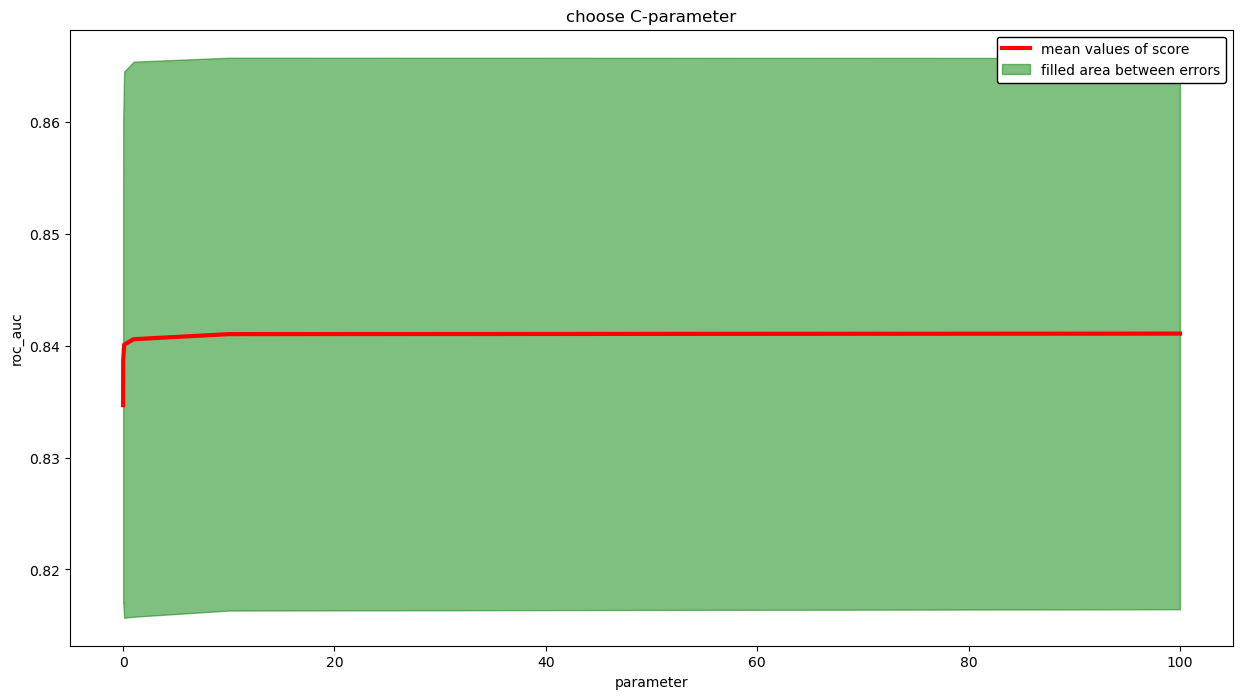

In [33]:
# Отрисуем изменение метрики ROC-AUC при изменении параметра С

plt.figure(figsize=(15,8))
plt.title(f'choose {param_name}-parameter')

plt.plot(grid, means, label='mean values of score', color='red', lw=3)

plt.fill_between(grid, means - 2 * error, means + 2 * error,
                 color='green', label='filled area between errors', alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.show()

In [34]:
# Используя подобранные параметры обучим модель на train множестве и применим на valid множестве для проверки
params_logreg.update(CV_model_logreg.best_params_)

best_logreg = LogisticRegression(**params_logreg)

best_logreg.fit(train[cols], train[target_col])
y_train_predicted = best_logreg.predict_proba(train[cols])[:, 1]
y_valid_predicted = best_logreg.predict_proba(valid[cols])[:, 1]

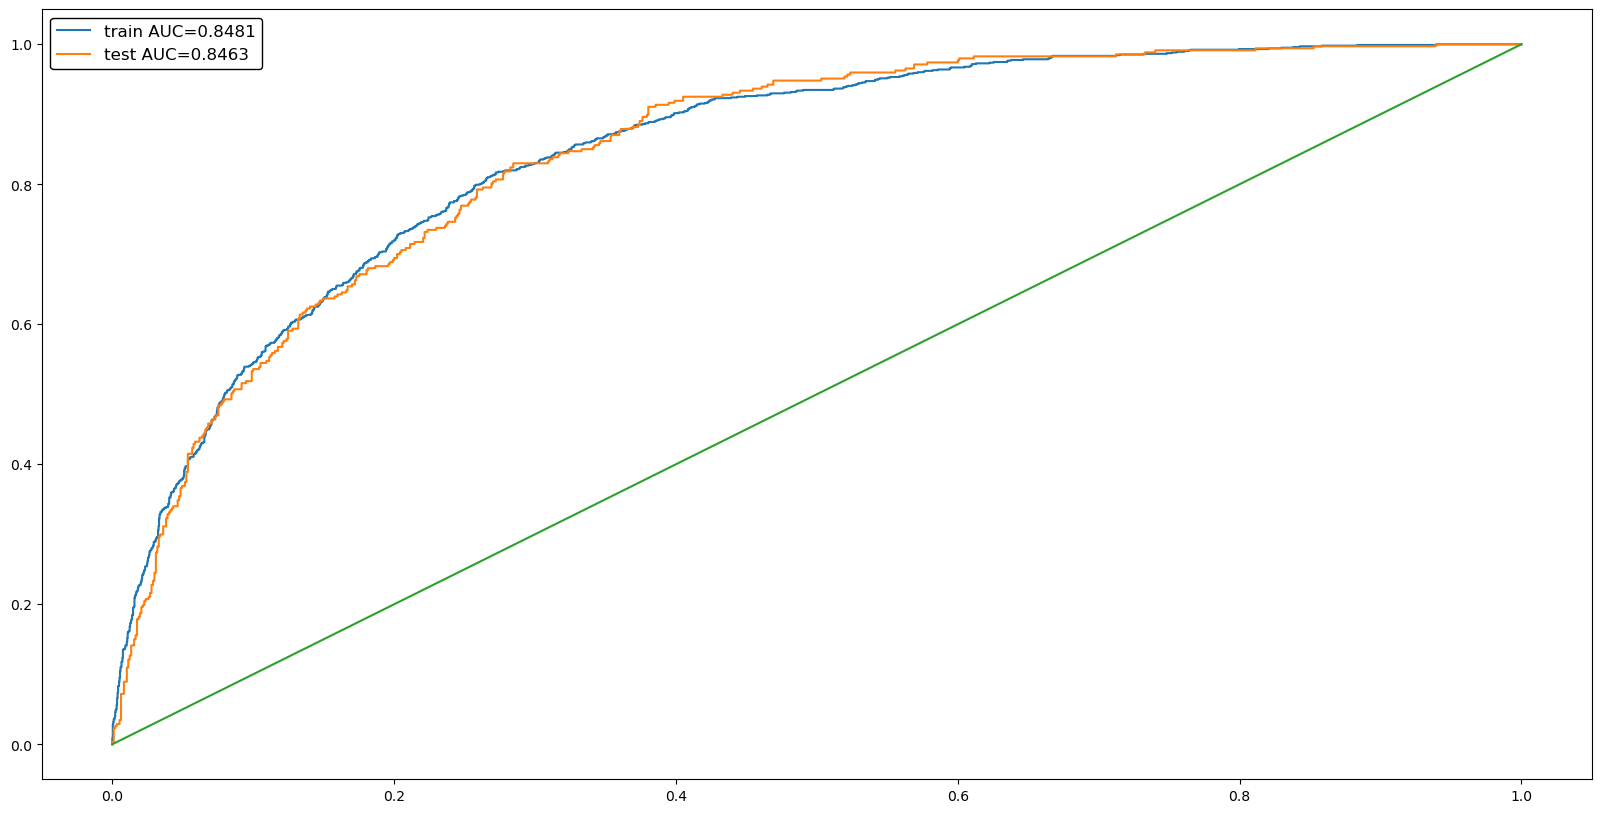

In [35]:
# Рассчитаем ROC-AUC и отрисуем ROC curve обученной модели

from sklearn.metrics import roc_auc_score, roc_curve

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

---
## Выводы по третьей части: 

* Использовал модель логистической регрессии
* Для поиска гиперпараметров использовал GridSearchCV с разбиением на 3 фолда с сеткой параметров {'C':[100, 10, 1, 0.1, 0.01, 0.001]}
* Оптимальным значением параметра оказалось C=10
* ROC-AUC на трейн множестве показал значение 85,58%
* ROC-AUC на валидационном множестве показал значение 82,53%
---
- Данные значения метрики, а также ее незначительного снижения говорят о стабильности и высоком качестве модели

In [36]:
import catboost as ctb

In [37]:
# Тренировочная выборка была разделена во второй части ДЗ на train/valid.
## Обучим и применим базовую модель CatBoostClassifier

params_ctb = {'random_state':42}

base_ctb = ctb.CatBoostClassifier(**params_ctb)

base_ctb.fit(X=train[feature_cols],
              y=train[target_col],
              cat_features=cat_cols,
              eval_set=(valid[feature_cols], valid[target_col]),
              use_best_model=True,
              verbose=100
             )

Learning rate set to 0.044493
0:	learn: 0.6641767	test: 0.6645884	best: 0.6645884 (0)	total: 191ms	remaining: 3m 11s
100:	learn: 0.3880674	test: 0.4100753	best: 0.4100753 (100)	total: 2.32s	remaining: 20.7s
200:	learn: 0.3691301	test: 0.4079979	best: 0.4073390 (189)	total: 5.28s	remaining: 21s
300:	learn: 0.3457245	test: 0.4100907	best: 0.4073390 (189)	total: 8.1s	remaining: 18.8s
400:	learn: 0.3254536	test: 0.4113769	best: 0.4073390 (189)	total: 10.8s	remaining: 16.2s
500:	learn: 0.3046547	test: 0.4155388	best: 0.4073390 (189)	total: 13.6s	remaining: 13.5s
600:	learn: 0.2879500	test: 0.4197742	best: 0.4073390 (189)	total: 16.8s	remaining: 11.2s
700:	learn: 0.2745750	test: 0.4226802	best: 0.4073390 (189)	total: 18.9s	remaining: 8.06s
800:	learn: 0.2612110	test: 0.4260047	best: 0.4073390 (189)	total: 21.7s	remaining: 5.4s
900:	learn: 0.2487450	test: 0.4282005	best: 0.4073390 (189)	total: 24.5s	remaining: 2.69s
999:	learn: 0.2368309	test: 0.4324117	best: 0.4073390 (189)	total: 26.5s	rema

In [38]:
# Лучшее количество итераций:

base_ctb.best_iteration_

189

Learning rate set to 0.085352
0:	learn: 0.6625951	total: 11.7ms	remaining: 2.21s
100:	learn: 0.3872216	total: 1.92s	remaining: 1.67s
188:	learn: 0.3727747	total: 3.47s	remaining: 0us


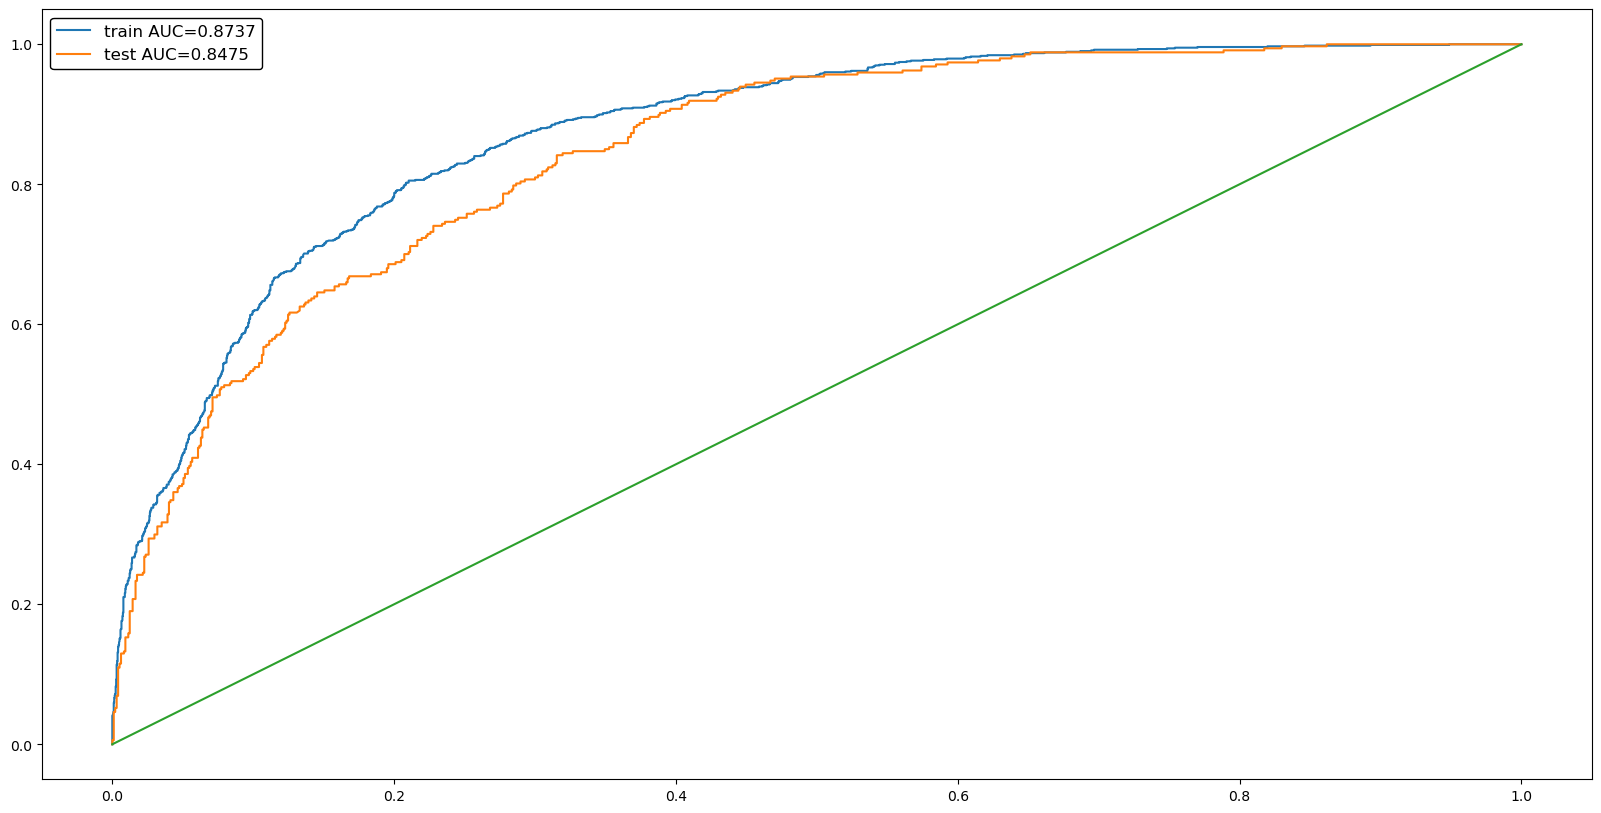

In [39]:
# Обновляем параметры кэтбуста, обучаем и применяем на валидационном множестве

params_ctb['iterations'] = base_ctb.best_iteration_

base_ctb = ctb.CatBoostClassifier(**params_ctb)
base_ctb.fit(X=train[feature_cols],
             y=train[target_col],
             cat_features=cat_cols,
             verbose=100
            )

y_train_predicted = base_ctb.predict_proba(train[feature_cols])[:, 1]
y_valid_predicted = base_ctb.predict_proba(valid[feature_cols])[:, 1]

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

* По графику видно переобучение, метрика падает более чем на 5% в абсолютной величине между train и valid множествах. Необходимо регуляризовать

### 2) Решение:

In [40]:
# Для борьбы с переобучением:
## Запустим поиск гиперпараметров с использованием оригинальных количественных фичей и OHE для категориальных
### Будем использовать GridSearchCV с метрикой ROC-AUC

model_ctb = ctb.CatBoostClassifier()
params_ctb = {'iterations': [500],
              'depth': [4, 5, 6],
              'learning_rate':[0.01,0.03,0.05],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'subsample':[0.6,0.9],
              'l2_leaf_reg': [3,1,5,10,100],
              'logging_level':['Silent'],
              'random_seed': [42]
         }

CV_model_ctb = GridSearchCV(estimator=model_ctb, 
                        param_grid=params_ctb, 
                        cv=3,
                        scoring='roc_auc', 
                        n_jobs=-1,
                        verbose=0
                       )

ctb_cols = num_cols + feature_names


In [41]:
%%time

CV_model_ctb.fit(train[ctb_cols],train[target_col])

CPU times: total: 9.75 s
Wall time: 3min 22s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000022EE7301BD0>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6], 'iterations': [500],
                         'l2_leaf_reg': [3, 1, 5, 10, 100],
                         'learning_rate': [0.01, 0.03, 0.05],
                         'logging_level': ['Silent'],
                         'loss_function': ['Logloss', 'CrossEntropy'],
                         'random_seed': [42], 'subsample': [0.6, 0.9]},
             scoring='roc_auc')

In [42]:
## Оптимальные значения параметров

CV_model_ctb.best_params_

{'depth': 4,
 'iterations': 500,
 'l2_leaf_reg': 5,
 'learning_rate': 0.01,
 'logging_level': 'Silent',
 'loss_function': 'Logloss',
 'random_seed': 42,
 'subsample': 0.6}

In [43]:
# Обновим параметры до оптимальных и запустим модель с обучением и проверкой на eval_set по метрике AUC

params_ctb = {'eval_metric':'AUC',
              'thread_count':-1,
              'depth': 4,
              'iterations': 500,
              'l2_leaf_reg': 100,
              'learning_rate': 0.03,
              'logging_level': 'Silent',
              'loss_function': 'Logloss',
              'random_seed': 42,
              'subsample': 0.9
             }

model_ctb = ctb.CatBoostClassifier(**params_ctb)

model_ctb.fit(X=train[feature_cols],
              y=train[target_col],
              cat_features=cat_cols,
              eval_set=(valid[feature_cols], valid[target_col]),
              early_stopping_rounds=150,
              use_best_model=True
             )

In [44]:
# Обновляем количество итераций по критерию остановы и обучаем финальную модель CatBoostClassifier

params_ctb['iterations'] = model_ctb.best_iteration_

best_ctb = ctb.CatBoostClassifier(**params_ctb)
best_ctb.fit(X=train[feature_cols],
             y=train[target_col],
             cat_features=cat_cols
            )

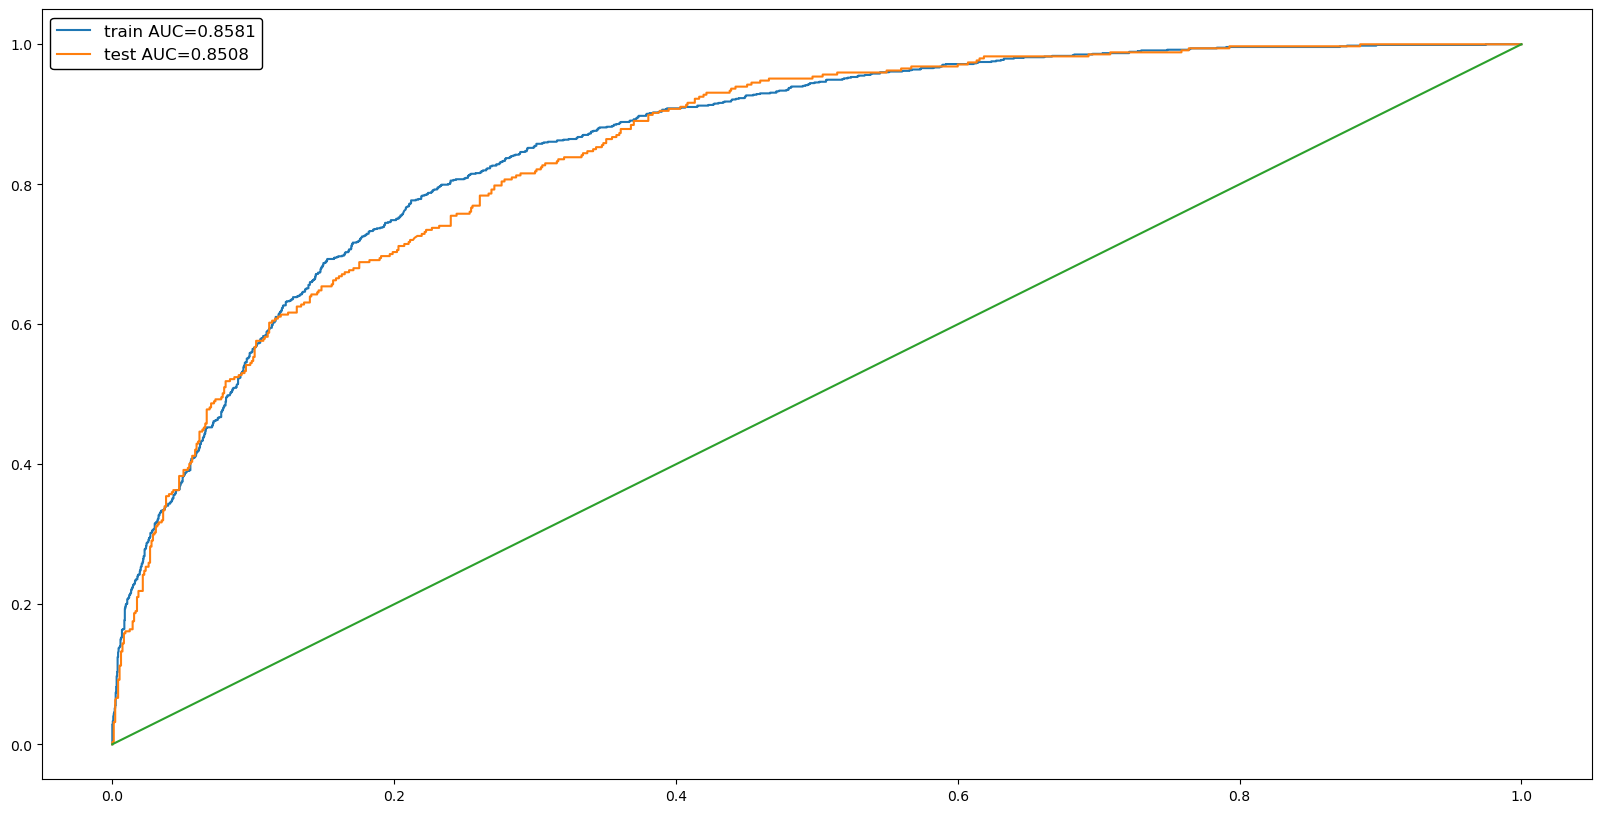

In [45]:
# Отрисовываем метрики по обученной модели

y_train_predicted = best_ctb.predict_proba(train[feature_cols])[:, 1]
y_valid_predicted = best_ctb.predict_proba(valid[feature_cols])[:, 1]

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

---
#### Выводы CatBoost: 

* Подобрал гиперпараметры регуляризации с помощью GrichSearchCV, далее лучшее количество итераций с использованием критерия остановы по валидационному множеству метрикой ROC-AUC. Получил следующий набор оптимальных гиперпараметров: 
    * {'eval_metric': 'AUC',
    * 'thread_count': -1,
    * 'depth': 4,
    * 'iterations': 362,
    * 'l2_leaf_reg': 100,
    * 'learning_rate': 0.03,
    * 'logging_level': 'Silent',
    * 'loss_function': 'Logloss',
    * 'random_seed': 42,
    * 'subsample': 0.9}
* Удалось сократить переобучение и немного стабилизировать результаты модели увеличив метрику на валидационном множестве